In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy

In [2]:
# CET: Central England Temp in tenths of a degree
df = pd.read_table('./HadleyCentre/cetdl1772on.dat')

In [3]:
df

,1772 1 32 -15 18 25 87 128 187 177 105 111 78 112
0,1772 2 20 7 28 38 77 138 154 ...
1,1772 3 27 15 36 33 84 170 139 ...
2,1772 4 27 -25 61 58 96 90 151 ...
3,1772 5 15 -5 68 69 133 146 179 ...
4,1772 6 22 -45 51 77 113 105 175 ...
...,...
7744,2021 27 54 -999 -999 -999 -999 -999 -999 ...
7745,2021 28 88 -999 -999 -999 -999 -999 -999 ...
7746,2021 29 79 -999 -999 -999 -999 -999 -999 ...
7747,2021 30 29 -999 -999 -999 -999 -999 -999 ...


In [4]:
df = pd.read_table('./HadleyCentre/cetdl1772on.dat',delim_whitespace=True,header=None)

In [5]:
df.head(40)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1772,1,32,-15,18,25,87,128,187,177,105,111,78,112
1,1772,2,20,7,28,38,77,138,154,158,143,150,85,62
2,1772,3,27,15,36,33,84,170,139,153,113,124,83,60
3,1772,4,27,-25,61,58,96,90,151,160,173,114,60,47
4,1772,5,15,-5,68,69,133,146,179,170,173,116,83,50
5,1772,6,22,-45,51,77,113,105,175,198,160,134,134,42
6,1772,7,25,12,58,87,106,162,146,194,158,114,134,32
7,1772,8,0,47,46,104,84,181,163,177,135,94,95,55
8,1772,9,0,56,21,87,67,155,179,155,143,106,70,62
9,1772,10,45,28,13,67,59,148,177,153,120,119,122,100


In [6]:
# Rearrange the data matrix
ts = []
for y in range(249):
    for m in range(12):
        for d in range(31):
            if df.iloc[y*31+d,m+2] != -999:
                ts.append(df.iloc[y*31+d,m+2]/10)

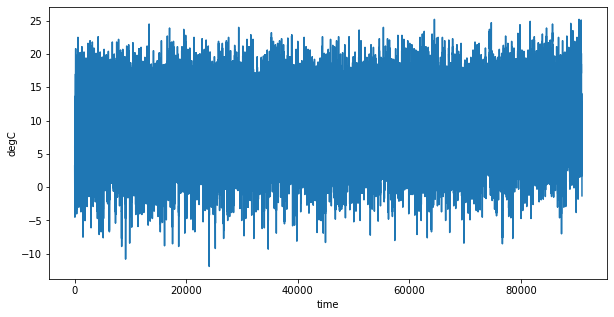

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ts)
plt.ylabel('degC')
plt.xlabel('time')
plt.show()

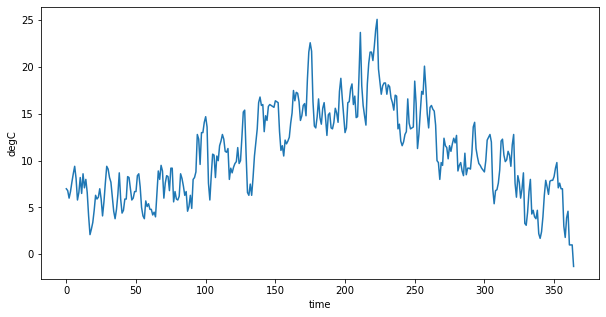

In [8]:
plt.figure(figsize=(10,5))
plt.plot(ts[-365:])
plt.ylabel('degC')
plt.xlabel('time')
plt.show()

# Matrix Profile (7 days example)

In [9]:
m = 7 # window size
# find a motif(pattern)
# c1: matrix profile (smallest euclidean distance)
# c2: matrix profile indices
# c3: left matrix profile indices
# c4: right matrix profile indices
mp = stumpy.gpu_stump(ts,m)

## Motif

In [10]:
motif_idx = np.argsort(mp[:, 0])[0] #closest pair
nearest_neighbor_idx = mp[motif_idx, 1]

In [11]:
print(motif_idx,nearest_neighbor_idx)

15697 15728


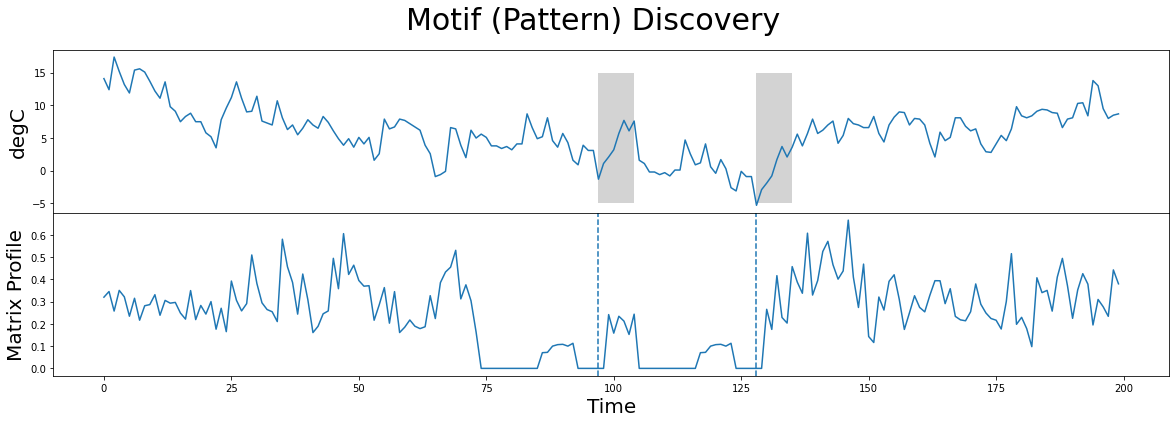

In [12]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(ts[15600:15800])
axs[0].set_ylabel('degC', fontsize='20')
rect = Rectangle((motif_idx-15600, -5), m, 20, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx-15600, -5), m, 20, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx-15600, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx-15600, linestyle="dashed")
axs[1].plot(mp[15600:15800, 0])
plt.show()

## Discord

In [13]:
discord_idx = np.argsort(mp[:, 0])[-1]
nearest_neighbor_distance = mp[discord_idx, 0]

In [14]:
print(discord_idx,nearest_neighbor_distance)

30144 0.9170825218449679


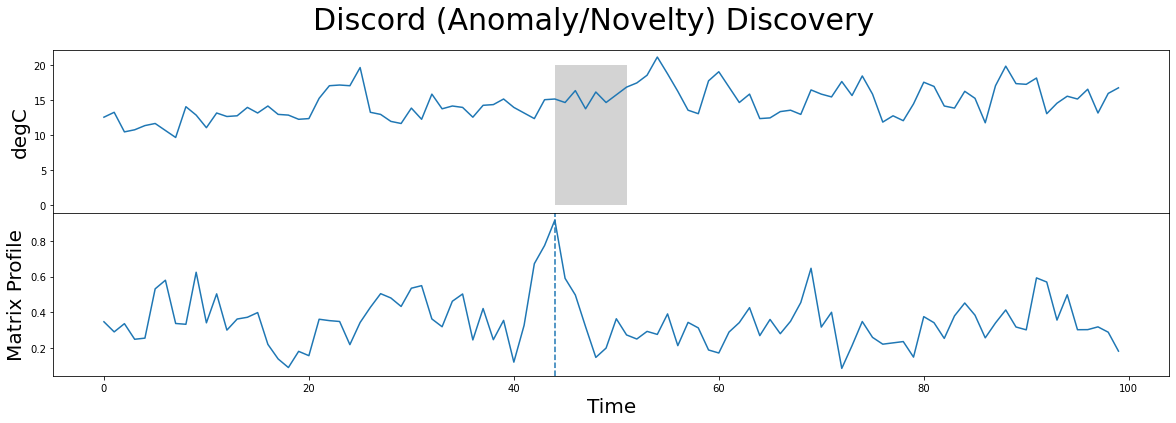

In [15]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(ts[30100:30200])
axs[0].set_ylabel('degC', fontsize='20')
rect = Rectangle((discord_idx-30100, 0), m, 20, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx-30100, linestyle="dashed")
axs[1].plot(mp[30100:30200, 0])
plt.show()